In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Uncomment if necessary
#from sklearn.preprocessing import OneHotEncoder
#from category_encoders import TargetEncoder
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from scipy.stats.mstats import winsorize
import seaborn as sns
#from collections import Counter
#from sklearn.datasets import make_classification
#from imblearn.under_sampling import RandomUnderSampler

In [2]:
db_unscaled = pd.read_csv('other/Session2/adult_preprocessed.csv')
df = pd.DataFrame(db_unscaled)

In [3]:
db_normalized = pd.read_csv('other/Session2/adult_preprocessed_normalized.csv')
dfn = pd.DataFrame(db_normalized)

In [4]:
db_standardized = pd.read_csv('other/Session2/adult_preprocessed_standardized.csv')
dfs = pd.DataFrame(db_standardized)

# Task 1

>Create a bar chart to visualize the distribution of work hours per week for people in different income categories. Are there any notable differences in the distribution of work hours for high-income earners compared to low-income earners? (Plot number of hours worked per week on the x-axis and income on the y-axis.)

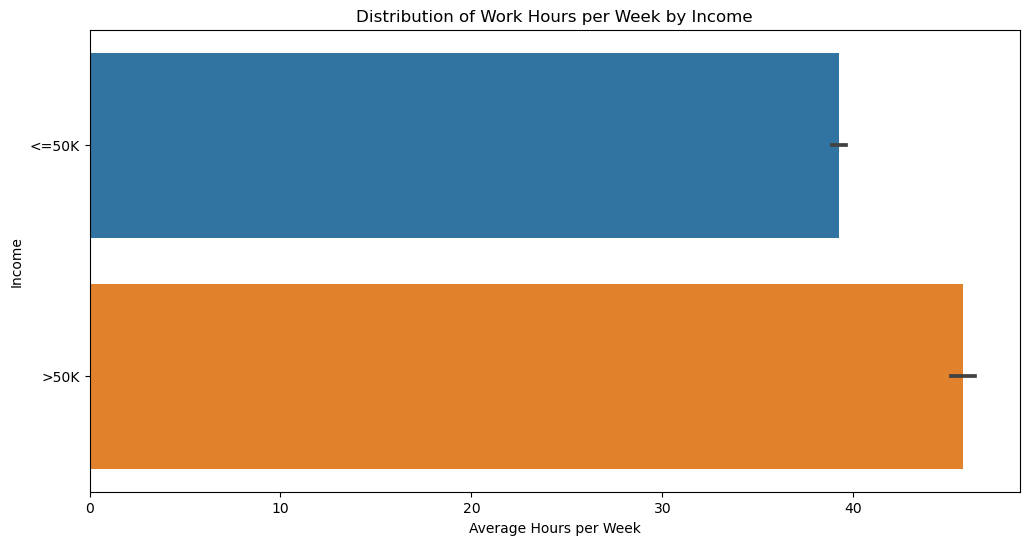

In [33]:
# Load the data
db = pd.read_csv('data/adult.csv')
df = pd.DataFrame(db)
sp_df = df[:5000]
df = pd.DataFrame(sp_df)
df
# List the columns that contain a question mark value
df.columns[df.isin(['?']).any()]
df = df[~df.isin(['?']).any(axis=1)]
#Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='hours-per-week', y='income', data=df)
plt.title('Distribution of Work Hours per Week by Income')
plt.xlabel('Average Hours per Week')
plt.ylabel('Income')
plt.show()

# Task 2

>Create a bar chart to compare the proportion of males and females in different occupation types. What does this visualization tell you about gender representation in different professions? 

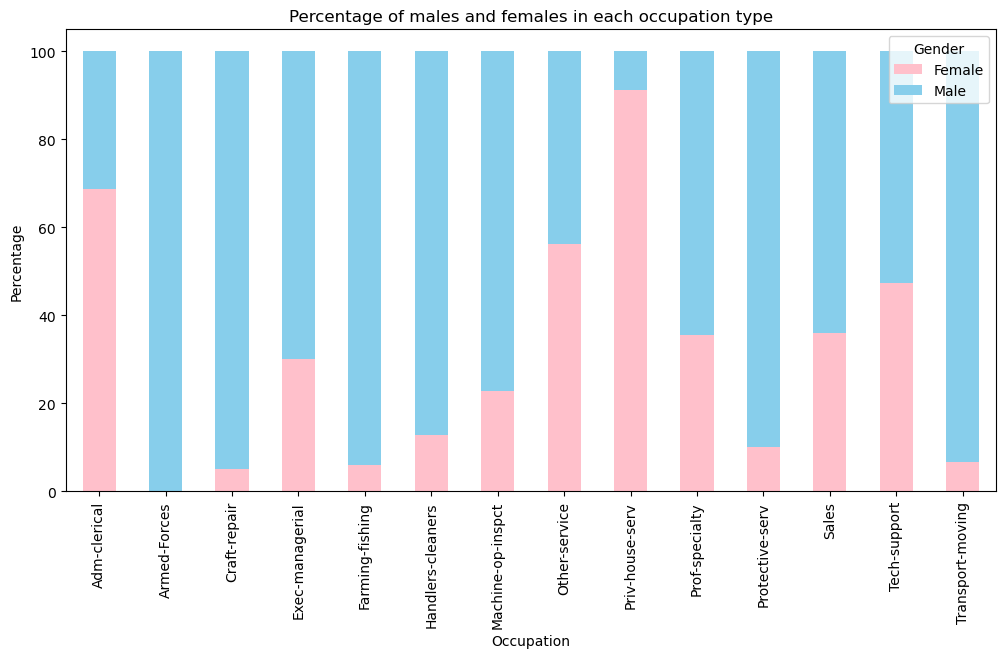

In [32]:
# Group the data by occupation type and gender
grouped = df.groupby(['occupation', 'gender']).size().reset_index(name='count')

# Calculate the total count for each occupation type
total_counts = grouped.groupby('occupation')['count'].sum()

# Calculate the percentage of males and females in each occupation type
grouped['percentage'] = grouped.apply(lambda x: x['count']/total_counts[x['occupation']] * 100, axis=1)

# Pivot the data to get separate columns for males and females
pivoted = grouped.pivot(index='occupation', columns='gender', values='percentage')

# Create a new figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar chart of the percentage of males and females in each occupation type
pivoted.plot(kind='bar', stacked=True, color=['pink', 'skyblue'], ax=ax)

# Add chart labels and legend
ax.set_title('Percentage of males and females in each occupation type')
ax.set_xlabel('Occupation')
ax.set_ylabel('Percentage')
ax.legend(title='Gender', loc='upper right')

# Display the plot
plt.show()


# Task 3

>Create a scatter plot to explore the relationship between age and work hours per week. What insights can you gain from this visualization?

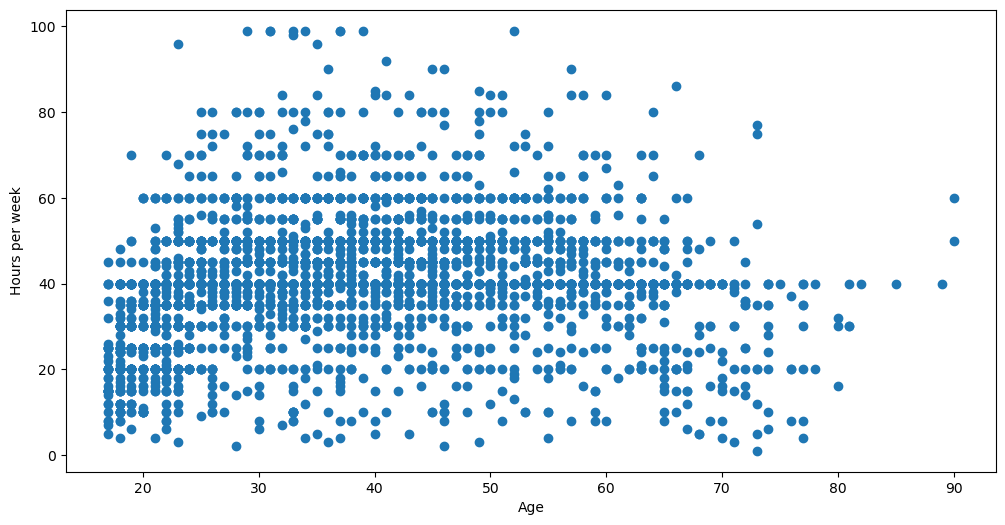

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df['age'], df['hours-per-week'])
plt.xlabel('Age')
plt.ylabel('Hours per week')
plt.show()

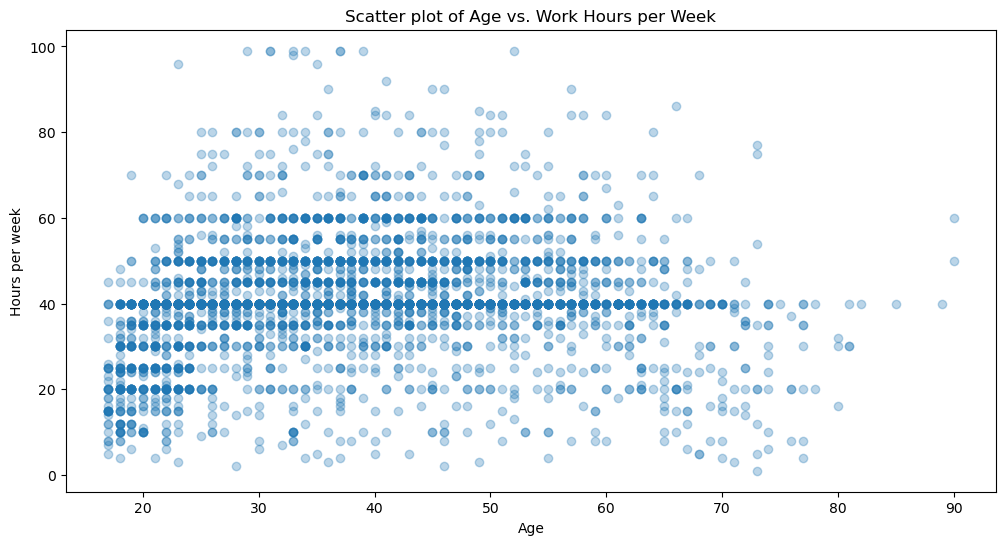

In [15]:
#second plot example:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['age'], df['hours-per-week'], alpha=0.3)

ax.set_xlabel('Age')
ax.set_ylabel('Hours per week')
ax.set_title('Scatter plot of Age vs. Work Hours per Week')

plt.show()

# Task 4

>Create a bar chart to compare the proportion of people in different income categories who are self-employed vs those employed by someone else. What does this visualization tell you about the distribution of income sources among different income groups? 

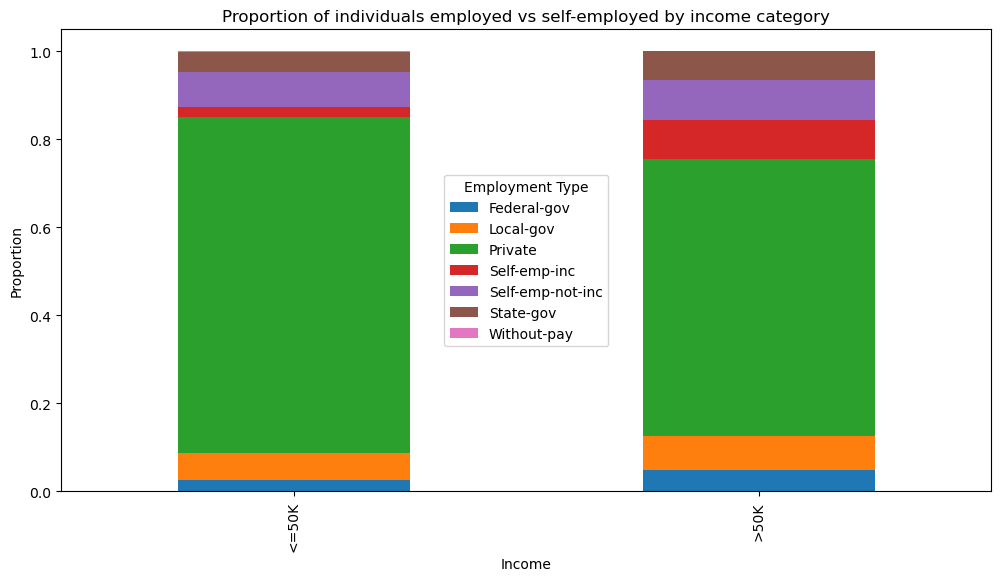

In [14]:
# Group the data by income and employment type, and count the number of occurrences for each group
employment_counts = df.groupby(['income', 'workclass']).size().unstack()

# Calculate the total number of individuals in each income category
income_totals = employment_counts.sum(axis=1)

# Calculate the proportion of individuals in each employment category for each income group
employment_proportions = employment_counts.div(income_totals, axis=0)

# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
employment_proportions.plot(kind='bar', stacked=True, ax=ax)

# Add chart labels and legend
ax.set_title('Proportion of individuals employed vs self-employed by income category')
ax.set_xlabel('Income')
ax.set_ylabel('Proportion')
ax.legend(title='Employment Type', loc='center')

plt.show()


# Task 5

>Create a histogram to visualize the distribution of age for people in different occupation types. Are there any notable differences in the distribution of age between different professions? 

# Task 6

>Create a scatter plot or bar chart to compare the distribution of education level between different occupation types. What insights can you gain from this visualization? 

# Task 7

>How does income vary by age? Create a scatter plot or line plot to show the relationship between income and age? 

# Task 8

>What is the relationship between income and education level? Create a bar chart or heat map to compare income levels across different education levels? 

# Task 9

>How does income vary by occupation? Create a bar chart to compare average incomes across different occupations? 

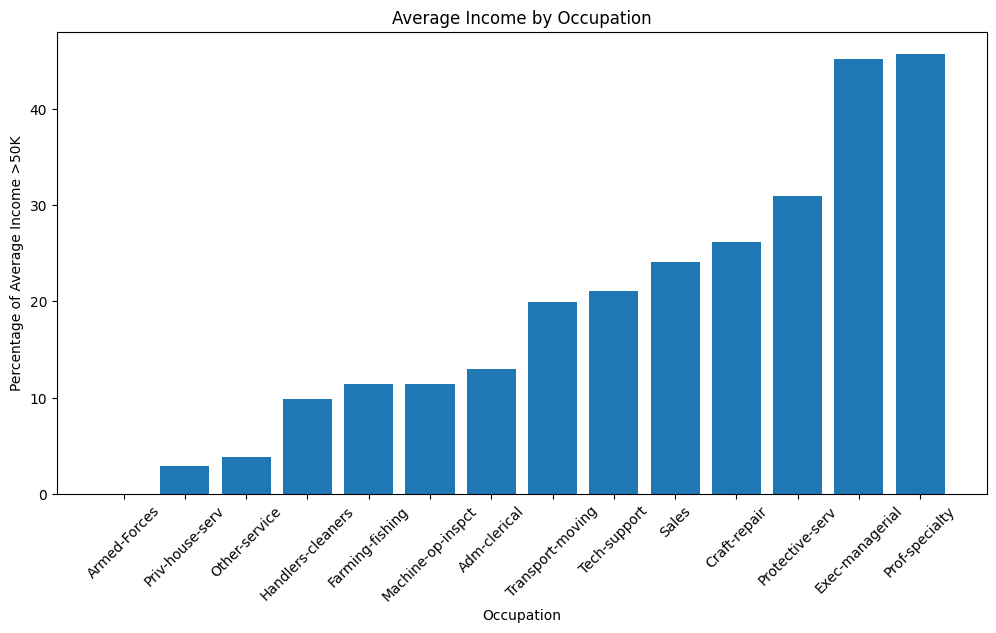

In [10]:
#df= pd.read_csv("data/adult.csv")

# Filter out the rows with "?" in the 'occupation' column
df_filtered = df[df['occupation'] != '?']

# Group the filtered data by occupation and calculate the mean income for each group
occupations_filtered = df_filtered.groupby('occupation')['income'].apply(lambda x: (x == '>50K').mean())

# Sort the DataFrame by the percentage of average income, ascending=True
occupations_filtered_sorted = occupations_filtered.sort_values(ascending=True)

# Create a bar chart to visualize the average income by occupation
plt.figure(figsize=(12, 6))
plt.bar(occupations_filtered_sorted.index, occupations_filtered_sorted.values * 100)  # Multiply by 100 to get percentages
plt.title('Average Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Percentage of Average Income >50K')
plt.xticks(rotation=45)
plt.show()

# Task 10

>Are there any interesting patterns in the data when you compare income levels across different regions or native countries?  Create a stacked bar chart to explore these differences? 

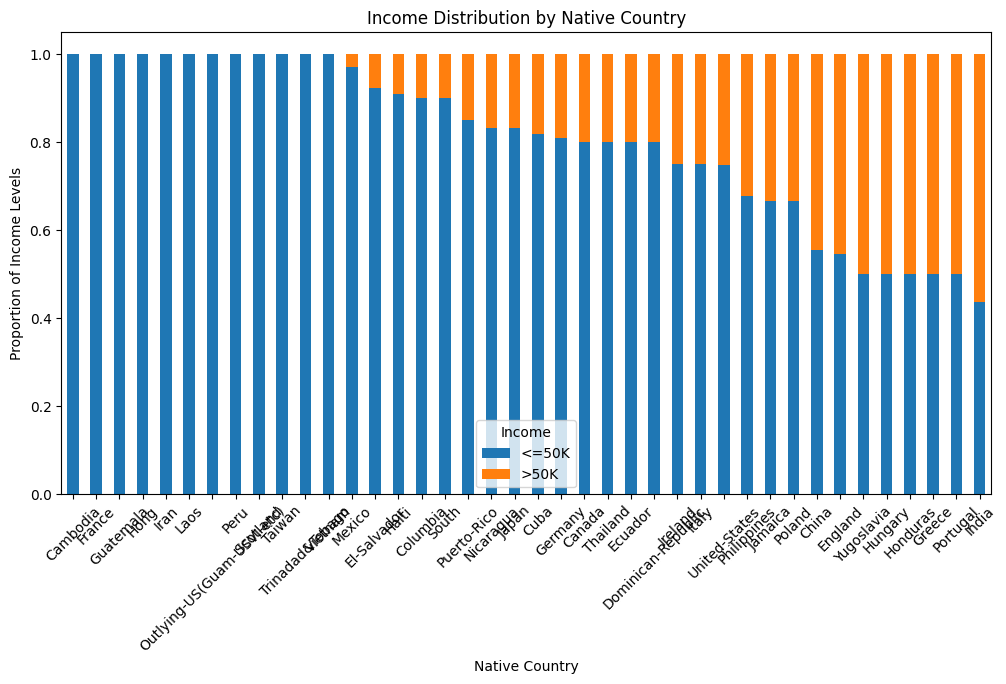

In [11]:
#df= pd.read_csv("data/adult.csv")

# Filter out the rows with "?" in the 'native-country' column
df = df[df['native-country'] != '?']

# Group the data by native country and income
country_income = df.groupby(['native-country', 'income']).size().unstack()

# Normalize the data within each native country
country_income_norm = country_income.div(country_income.sum(axis=1), axis=0)

# Sort the DataFrame by the proportion of income levels, ascending true
country_income_norm_sorted = country_income_norm.sort_values(by='>50K', ascending=True, na_position='first').fillna(0)

# Create a stacked bar chart to visualize income levels across native countries
fig, ax = plt.subplots(figsize=(12, 6))
country_income_norm_sorted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Income Distribution by Native Country')
ax.set_xlabel('Native Country')
ax.set_ylabel('Proportion of Income Levels')
plt.xticks(rotation=45)
ax.legend(title='Income')
plt.show()

# Task 11

>Create a stacked bar chart to show the distribution of different race categories among the different income groups 

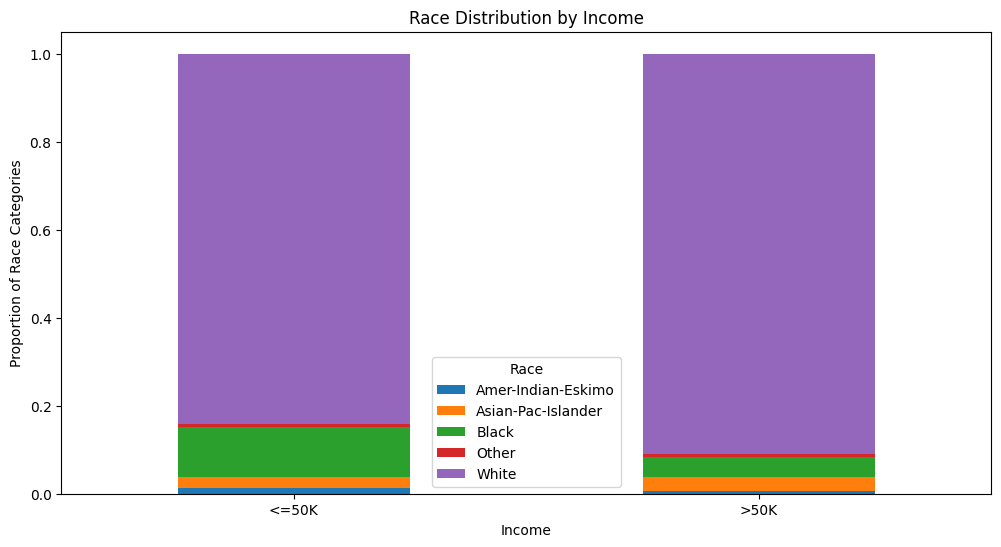

In [12]:
#df= pd.read_csv("data/adult.csv")

# Group the data by income and race
race_income = df.groupby(['income', 'race']).size().unstack()

# Normalize the data within each income group
race_income_norm = race_income.div(race_income.sum(axis=1), axis=0)

# Create a stacked bar chart to visualize the distribution of race categories among income groups
fig, ax = plt.subplots(figsize=(12, 6))
race_income_norm.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Race Distribution by Income')
ax.set_xlabel('Income')
ax.set_ylabel('Proportion of Race Categories')
plt.xticks(rotation=0)
ax.legend(title='Race')
plt.show()

# Task 12

>How does income vary by marital status? Create a stacked bar chart or grouped bar chart to compare income across different marital statuses?

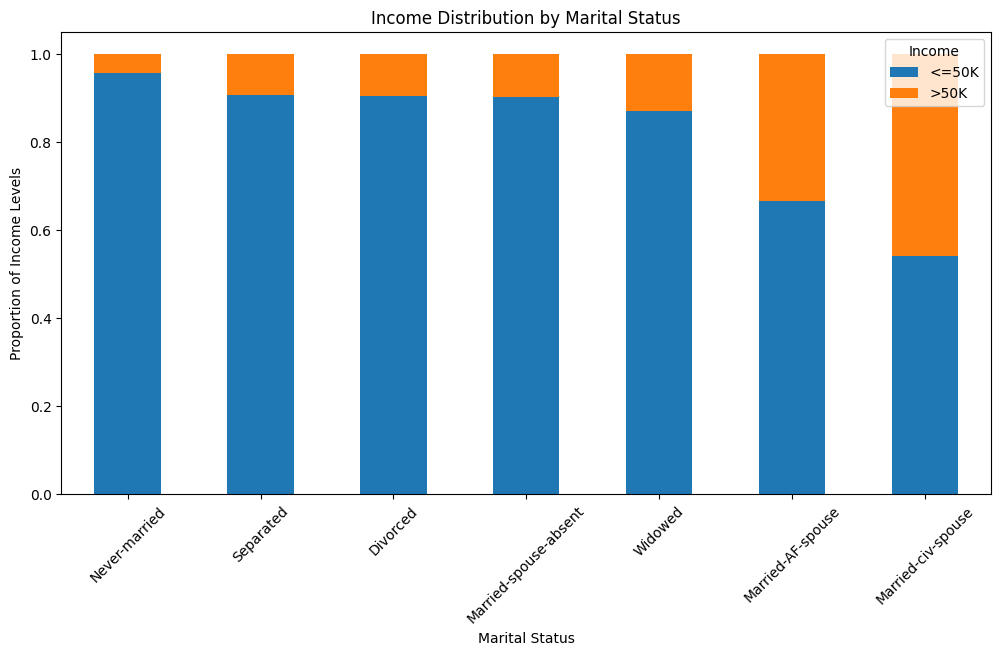

In [13]:
#df= pd.read_csv("data/adult.csv")

# Group the data by marital status and income
marital_income = df.groupby(['marital-status', 'income']).size().unstack()

# Normalize the data within each marital status
marital_income_norm = marital_income.div(marital_income.sum(axis=1), axis=0)

# Sort the DataFrame by the proportion of '>50K' income
marital_income_norm_sorted = marital_income_norm.sort_values(by='>50K', ascending=True)

# Create a stacked bar chart to visualize income levels across marital statuses
fig, ax = plt.subplots(figsize=(12, 6))
marital_income_norm_sorted.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Income Distribution by Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Proportion of Income Levels')
plt.xticks(rotation=45)
ax.legend(title='Income')
plt.show()

# Task 13

>Create a stacked bar chart to compare the distribution of occupation types across different native countries. Are there any notable differences in job roles based on country of origin? 

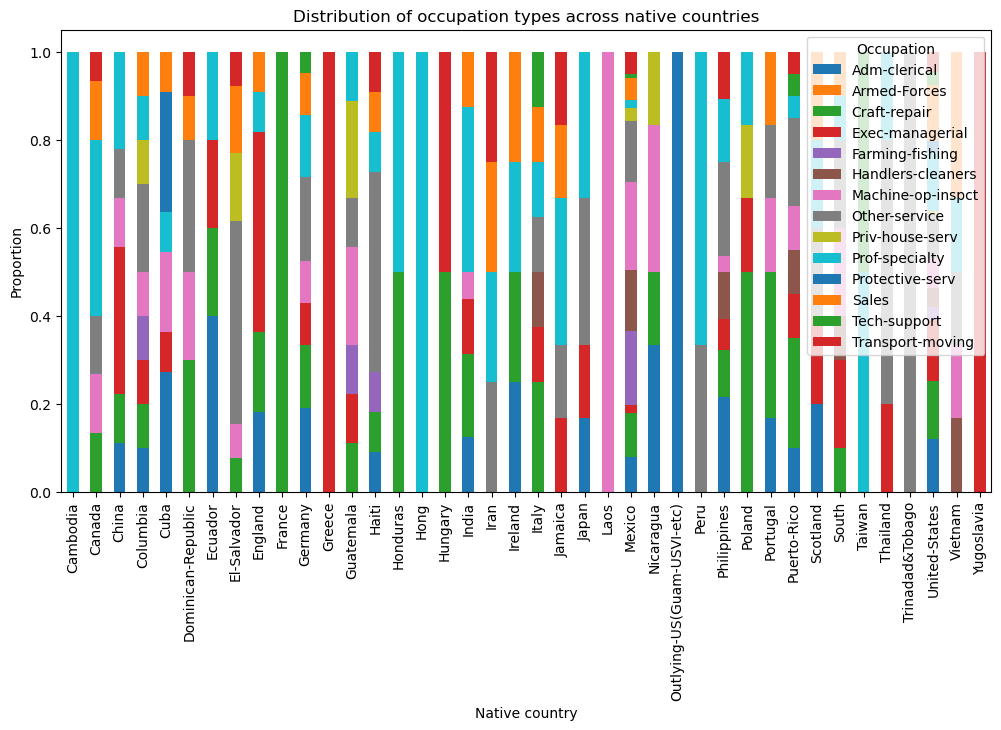

In [12]:
# Group the data by native country and occupation, and count the number of occurrences for each group
occupation_counts = df.groupby(['native-country', 'occupation']).size().unstack()

# Normalize the counts by row to get the proportion of each occupation within each country
occupation_proportions = occupation_counts.div(occupation_counts.sum(axis=1), axis=0)

# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
occupation_proportions.plot(kind='bar', stacked=True, ax=ax)

# Add chart labels and legend
ax.set_title('Distribution of occupation types across native countries')
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion')
ax.legend(title='Occupation', loc='upper right')

plt.show()


# Task 14

>How does the distribution of education levels vary across different native countries? Use a stacked bar chart to visualize the data and identify any significant differences in educational attainment based on country of origin.

AttributeError: 'Figure' object has no property 'pltsize'

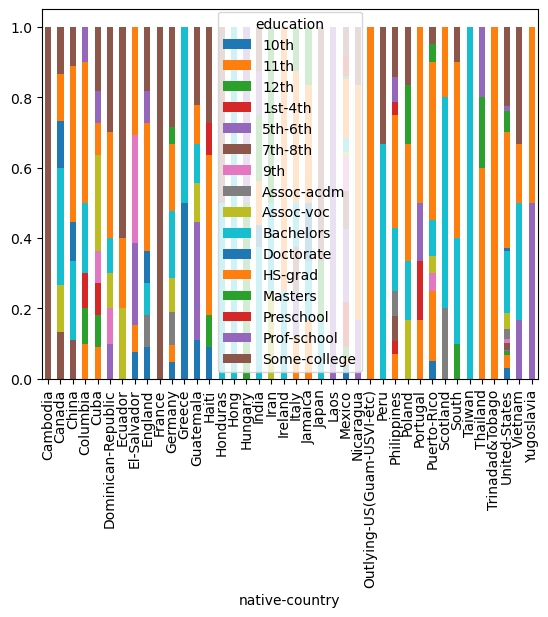

In [37]:
# Group the data by native country and education level, and count the number of occurrences for each group
education_counts = df.groupby(['native-country', 'education']).size().unstack()

# Calculate the total number of individuals in each native country
country_totals = education_counts.sum(axis=1)

# Calculate the proportion of individuals in each education level for each native country
education_proportions = education_counts.div(country_totals, axis=0)

# Create a figure and axis object with a specified size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the stacked bar chart
education_proportions.plot(kind='bar', stacked=True, ax=ax)

# Add chart labels and legend
ax.set_title('Distribution of Education Levels by Native Country')
ax.set_xlabel('Native Country')
ax.set_ylabel('Proportion')
ax.legend(title='Education Level', loc='upper right')

plt.show()
